In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import data
import model
import ddsp.training
import gin
import IPython.display

In [2]:
gin_file_path = 'd:/soundofai/ddsp_trained_30k/operative_config-30000.gin'
ddsp_model_path = 'd:/soundofai/ddsp_trained_30k'
f0_model_path = 'checkpoints/best.h5'
dataset_dir = 'd:/soundofai/prepare_pitch_60_data/pitch_60_dataset'

In [3]:
valid_generator = data.data_generator_all_features(data.complete_record_generator(
    dataset_dir=dataset_dir,
    set_name='valid',
    batch_size=1
))

f0_model = model.create_model()
f0_model.load_weights(f0_model_path)

gin.parse_config_file(gin_file_path)
ddsp_model = ddsp.training.models.Autoencoder(encoder=None)
ddsp_model.restore(ddsp_model_path)

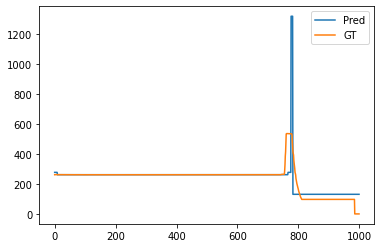

In [80]:
plt.figure(figsize=(6, 4))

inputs, outputs, features = next(valid_generator)
preds = f0_model.predict(inputs)

f0_pred = data.f0_decode(preds[0])

plt.plot(range(1000), f0_pred, label='Pred')
plt.plot(range(1000), np.squeeze(features['f0_hz']), label='GT')
plt.legend()
plt.show()

In [81]:
ddsp_input = {
    'f0_hz': np.zeros((1, 1000)) + 261.63,
    'loudness_db': features['loudness_db'],
    'z': np.reshape(features['z'], (1, 1000, 16))
}

ddsp_outputs = ddsp_model(ddsp_input, training=False)
audio_pred = ddsp_model.get_audio_from_outputs(ddsp_outputs)

In [82]:
IPython.display.Audio(audio_pred, rate=16000)

In [83]:
IPython.display.Audio(features['audio'], rate=16000)

In [84]:
features['f0_hz'][0, :20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([261.3973 , 261.67987, 261.76126, 261.9264 , 261.92575, 261.98   ,
       261.9748 , 261.99197, 262.03128, 261.97012, 261.89514, 261.8594 ,
       261.88202, 261.91068, 261.91858, 261.8876 , 261.83685, 261.86465,
       261.92627, 261.9619 ], dtype=float32)>